<a href="https://colab.research.google.com/github/drabhishekk14/AIML_Notebooks/blob/main/SIG742Task2_Group_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Student Name : - Abhishek Kadam, Krishnamurthy S, Abhinav Kapoor**

### **Student id: - 223014373, 223019221 ,223029476**

### **Attempting High Distinction: - Yes**

Importing all required libraries

In [1]:
#Importing all the packages needed for the midterm assignment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Part 1**

**Answer 1.1**

Loading the json data into Pandas dataframe saved on Google drive

In [3]:
df = pd.read_json('/content/drive/MyDrive/MDS/assignment2data.json', lines = True)

In [4]:
#Checking the shape of dataframe
df.shape

(46279, 43)

dataset has 46279 rows and 43 columns

In [5]:
# Find out how many rows are duplicated
print('Number of Duplicate Values in df: ', df.duplicated().sum())

Number of Duplicate Values in df:  249


In [6]:
dup_series = df.duplicated()

#Showing the duplicates in the dataframe.
df[dup_series]

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
25042,0,0,16,N,0,0,0,14,0,4,...,0,0,1,16,0,1,0,1,0,0.3068
25252,0,0,0,Y,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0.1999
25289,0,0,0,Y,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0.2140
25379,0,0,0,Y,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0.3000
25458,0,0,1,N,0,0,0,1,0,1,...,0,0,1,2,0,1,0,0,0,0.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45520,0,0,4,Y,0,0,0,0,0,2,...,0,0,3,4,0,1,0,1,0,0.2501
45569,0,0,57,Y,1,1,17,25,0,20,...,0,0,5,60,0,3,0,29,0,0.2977
45605,0,0,2,N,0,0,1,2,0,1,...,0,0,0,2,0,1,0,0,0,0.7752
46051,0,0,0,N,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0.0000


The above code shows that there are 249 duplicate values in dataset

In [7]:
# Dropping duplictes and vaing it to new dataset
df_new = df.drop_duplicates()

In [8]:
print('Shape of new dataframe is', df_new.shape)

Shape of new dataframe is (46030, 43)


In [9]:
#check if there are any duplicates in new dataset
print('Number of Duplicate Values in df_new: ', df_new.duplicated().sum())

Number of Duplicate Values in df_new:  0


**The original dataframe had 46279 records, and after removing the 249 duplicates the final dataframe has 46030 records.**

**Answer 1.2**

In [10]:
# Defining a function 'missingdf' for could print out all the column 
#in dataframe df and also the missing value rate for each column.
def missingdf(df):
  column_name = df.columns # For collecting all the column names in
  new_df = [] # For collecting missing value rate
  for i in range (df.columns.shape[0]): # For loop to iterate over all the columns
    missing_value_rate = df.isnull().sum()/len(df)*100 # Calculating missing value rate
    new_df.append(missing_value_rate) # Appending the missing value rate to new_df
    # converting the list new_df to a dataframe with prescribed column names
    new_df = pd.DataFrame({'column_name':column_name,'percent_missing':missing_value_rate}) 
    return(new_df)

In [11]:
Percent_Missing = missingdf(df_new)
Percent_Missing

,column_name,percent_missing
sacc_items,sacc_items,0.000000
work_orders,work_orders,0.000000
female_items,female_items,0.000000
is_newsletter_subscriber,is_newsletter_subscriber,0.000000
male_items,male_items,0.000000
afterpay_payments,afterpay_payments,0.000000
msite_orders,msite_orders,0.000000
wftw_items,wftw_items,0.000000
mapp_items,mapp_items,0.000000
orders,orders,0.000000


**Answer 1.3**

In [12]:
#define a function column_list(df) which could return a list which only contains the numerical
#column names and another list which only contains the categorical column names.
def column_list(df):
  Numerical_Columns = df.select_dtypes(exclude=['object']).columns.tolist()
  Categorical_Columns = df.select_dtypes(include=['object']).columns.tolist()
  print("Numerical_Columns are %s" % (Numerical_Columns))
  print("Categorical_Columns are %s" %(Categorical_Columns))

In [13]:
# list which only contains the numerical column names and another list which only contains the categorical column names
# passing df_new dataframe which has no duplicates (duplicates were removed at step 1.1)
dataframe_cols = column_list(df_new)

Numerical_Columns are ['sacc_items', 'work_orders', 'female_items', 'male_items', 'afterpay_payments', 'msite_orders', 'wftw_items', 'mapp_items', 'orders', 'cc_payments', 'curvy_items', 'paypal_payments', 'macc_items', 'cancels', 'revenue', 'returns', 'other_collection_orders', 'parcelpoint_orders', 'android_orders', 'days_since_last_order', 'vouchers', 'average_discount_used', 'shipping_addresses', 'redpen_discount_used', 'mftw_items', 'days_since_first_order', 'unisex_items', 'home_orders', 'coupon_discount_applied', 'desktop_orders', 'ios_orders', 'apple_payments', 'wspt_items', 'wacc_items', 'items', 'mspt_items', 'devices', 'different_addresses', 'wapp_items', 'other_device_orders', 'average_discount_onoffer']
Categorical_Columns are ['is_newsletter_subscriber', 'customer_id']


In [14]:
# Using describe() function from pandas to print out the statistics for all num
df_new.describe(exclude = ['object'])

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,...,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,0.087899,0.240995,6.472800,1.720660,0.053595,0.978557,1.633826,0.926613,4.111362,0.642972,...,0.000565,0.378753,0.573908,8.583750,0.116229,1.277580,0.116402,3.800782,0.000043,0.190171
std,0.539604,1.565071,17.830007,5.468827,0.225220,2.859161,4.088452,3.689578,8.122569,0.479128,...,0.023760,1.712662,2.542536,19.959377,0.716745,0.533286,0.320710,12.679782,0.009322,0.190702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.150000
75%,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.314300
max,29.000000,84.000000,537.000000,273.000000,1.000000,172.000000,261.000000,151.000000,665.000000,1.000000,...,1.000000,56.000000,353.000000,701.000000,38.000000,3.000000,1.000000,409.000000,2.000000,1.000000


In [15]:
df_new.describe(exclude = ['object']).T

,count,mean,std,min,25%,50%,75%,max
sacc_items,46030.0,0.087899,0.539604,0.0,0.0000,0.0000,0.00000,29.00
work_orders,46030.0,0.240995,1.565071,0.0,0.0000,0.0000,0.00000,84.00
female_items,46030.0,6.472800,17.830007,0.0,0.0000,2.0000,5.00000,537.00
male_items,46030.0,1.720660,5.468827,0.0,0.0000,0.0000,1.00000,273.00
afterpay_payments,46030.0,0.053595,0.225220,0.0,0.0000,0.0000,0.00000,1.00
msite_orders,46030.0,0.978557,2.859161,0.0,0.0000,0.0000,1.00000,172.00
wftw_items,46030.0,1.633826,4.088452,0.0,0.0000,0.0000,2.00000,261.00
mapp_items,46030.0,0.926613,3.689578,0.0,0.0000,0.0000,0.00000,151.00
orders,46030.0,4.111362,8.122569,1.0,1.0000,2.0000,4.00000,665.00
cc_payments,46030.0,0.642972,0.479128,0.0,0.0000,1.0000,1.00000,1.00


In [16]:
df_new.isnull().sum()

sacc_items                      0
work_orders                     0
female_items                    0
is_newsletter_subscriber        0
male_items                      0
afterpay_payments               0
msite_orders                    0
wftw_items                      0
mapp_items                      0
orders                          0
cc_payments                     0
curvy_items                     0
paypal_payments                 0
macc_items                      0
cancels                         0
revenue                         0
returns                         0
other_collection_orders         0
parcelpoint_orders              0
customer_id                     0
android_orders                  0
days_since_last_order           0
vouchers                        0
average_discount_used           0
shipping_addresses              0
redpen_discount_used            0
mftw_items                      0
days_since_first_order          0
unisex_items                    0
home_orders   

 **Answer 1.4**

**There are two columns which are corrupted.** **Could you find it out and**
**explain the reason?**

Answer - The two columns which seem to be corrupted are **"redpen_discount_used"** and **"coupon_discount_applied"**. There is no description of these cloumns available. While the column names indicate discount applied, there is another column **"average_discount_used"** available with a appropirate description. Hence, the columns "redpen_discount_used" and "coupon_discount_applied" are not providing any additional information about the customer. When the dataframe was reviewed, strong correlation between "average_discount_used" and "redpen_discount_used" and "coupon_discount_applied" **was not observed** as shown in the heat map below. **Hence my recommendation is to remove these two columns from the dataset.**

In [17]:
df_temp = df_new[['average_discount_used','redpen_discount_used','coupon_discount_applied']].copy()
df_temp.info()
print(' ')
print(df_temp.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46030 entries, 0 to 46278
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_discount_used    46030 non-null  float64
 1   redpen_discount_used     46030 non-null  float64
 2   coupon_discount_applied  35826 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB
 
       average_discount_used  redpen_discount_used  coupon_discount_applied
count           46030.000000          46030.000000             35826.000000
mean             2357.118087            435.567699               175.173407
std              2032.366465           1851.597072               841.277098
min                 0.000000              0.000000                 0.000000
25%                80.974900              0.000000                 0.000000
50%              2122.822500             54.480000                 0.000000
75%              3829.608450            253.6775

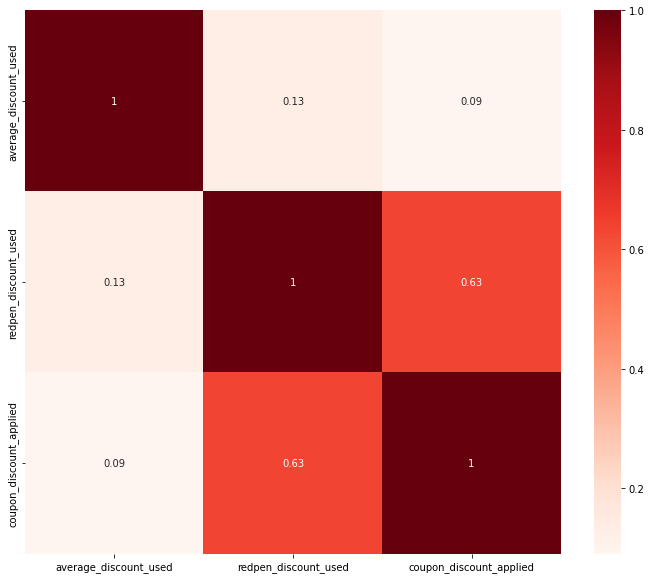

In [18]:
plt.figure(figsize=(12,10))
cor = df_temp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Answer 1.5**

In [19]:
#Write code and return the results by using pandas package to find out ”What percentage of 
#customers who have purchased female items have paid by credit card?”

# create variable 'female_items' to collect count of customers that purchased female items
female_items = len(df_new[df_new['female_items'] !=0])
female_items
print("Total count of female items purchased is %s" % (female_items))

# create variable 'cc_payment_female_items' to collect count of customers that purchased female items with cc payment
cc_payments_female_items = len(df_new[(df_new['cc_payments']== 1) & (df_new['female_items']!= 0)])
cc_payments_female_items
print("Count of female items purchased with credit card is %s" % (cc_payments_female_items))

#create variable 'percentage' to collect the calculation of percentage of female items purchased with credit card and rounding it to 2 decimal places
percentage = round(cc_payments_female_items/female_items *100, 2)
percentage
print("Therefore percentage of female items purchased by credit card is %s percent." % (percentage))

Total count of female items purchased is 34335
Count of female items purchased with credit card is 22483
Therefore percentage of female items purchased by credit card is 65.48 percent.


In [20]:
#Write code and return the results by using pandas package to find out ”What was the total
#revenue to the nearest dollar for customers who have paid by credit card?”

#Create a dataframe 'revenue_cc' which has records where revenue is not zero and credit card payment is true.
revenue_cc = df_new[(df_new['revenue'] != 0) & (df_new['cc_payments']== 1)]

#Create a variable 'revenue_cc_sum' to collect the sum of values in the 'revenue' column of 'revenue_cc' dataframe.
revenue_cc_sum = round(revenue_cc['revenue'].sum(), 0)

#printing the total revenue to the nearest dollar.
print("The total revenue to the nearest dollar for customers who paid by credit card is $%s" %(revenue_cc_sum))

The total revenue to the nearest dollar for customers who paid by credit card is $50189329.0


**Answer 1.6**

In [21]:
# change the value of 'Y' from column is_newsletter_subscriber to 1 and 'N' from column is_newsletter_subscriber to 0. 1 and 0 to be integers
#using replace() method to change the values as it allows object dtype to be replaced with int dtype
df_1_6 = df_new.replace({'is_newsletter_subscriber': {'Y': 1, 'N':0}})

#printing the head of 'is_newsletter_subscriber' cloumn to ensure the replacement is in effect.
print('Validating if the values have been converted to 1 & 0')
print(df_1_6.is_newsletter_subscriber.head())

# Print out the value count for column is_newsletter_subscriber.
is_newsletter_subscriber_count_1 = df_1_6['is_newsletter_subscriber'].value_counts()[1]
is_newsletter_subscriber_count_0 = df_1_6['is_newsletter_subscriber'].value_counts()[0]

print ("The value count for column 'is_newsletter_subscriber' where value is '1' is %s and where value is '0' the count is %s"  
       % (is_newsletter_subscriber_count_1, is_newsletter_subscriber_count_0))

Validating if the values have been converted to 1 & 0
0    0
1    1
2    1
3    1
4    1
Name: is_newsletter_subscriber, dtype: int64
The value count for column 'is_newsletter_subscriber' where value is '1' is 18827 and where value is '0' the count is 27203


**Answer 1.7**

In [22]:
#Create some new features for the dataframe by using the code provided in the assingment.

#df_new dataframe has been used as it has non duplicate rows (as done in Answer 1.1)

df_new['female_item_rate' ] = df_new['female_items'] / df_new['items']
df_new['male_item_rate' ] = df_new['male_items'] / df_new['items']
df_new['unisex_item_rate' ] = df_new['unisex_items'] / df_new['items']

#How many rows (customers) could have the value female_item_rate == 1. Using value_counts method to count the specific vlaues in column
female_item_rate_count_1 = df_new['female_item_rate'].value_counts()[1]
print('%s rows have female_item_rate equal to 1.' % (female_item_rate_count_1))

#How many rows (customers) could have the value male_item_rate == 1. Using value_counts method to count the specific vlaues in column
male_item_rate_count_1 = df_new['male_item_rate'].value_counts()[1]
print('%s rows have male_item_rate equal to 1.' % (male_item_rate_count_1))

#How many rows (customers) could have the value orders > 4.11. Used the len function to get the number of rows that were meeting the specific criterion
orders = len(df_new[df_new['orders'] > 4.11])
print('%s rows have orders > 4.11.' % (orders))

23763 rows have female_item_rate equal to 1.
7890 rows have male_item_rate equal to 1.
9987 rows have orders > 4.11.


**Answer 1.8**

In [23]:
# use the original format of the data to group data on the value of column
#'is_newsletter_subscriber' to show the average order value, the max order value, the median order value.

# Since the dataframe is recreated for this answer the data frame has original values 'Y' and 'N' in the column 'is_newsletter_subscriber'.

#Used the groupby function to group the data.
grouped_data = df_new.groupby('is_newsletter_subscriber')
grouped_data.first()

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer,female_item_rate,male_item_rate,unisex_item_rate
is_newsletter_subscriber,,,,,,,,,,,,,,,,,,,,,
N,0,0,46,2,0,0,7,2,17,1,...,50,0,1,0,35,0,0.3364,0.920000,0.04,0.040000
Y,0,0,24,0,0,12,2,0,13,0,...,26,0,2,0,16,0,0.1404,0.923077,0.00,0.076923


In [24]:
#Showing average order value
average_order_value = grouped_data.orders.mean()
average_order_value
print("The average order value based on newsletter subcription is \n%s" % (average_order_value))


The average order value based on newsletter subcription is 
is_newsletter_subscriber
N    2.484175
Y    6.462474
Name: orders, dtype: float64


In [25]:
#Showing max order value
max_order_value = grouped_data.orders.max()
max_order_value
print("The maximum order value based on newsletter subcription is \n%s" % (max_order_value))

The maximum order value based on newsletter subcription is 
is_newsletter_subscriber
N    665
Y    234
Name: orders, dtype: int64


In [26]:
#Showing median order value
median_order_value = grouped_data.orders.median()
median_order_value
print("The median order value based on newsletter subcription is \n%s" % (median_order_value))

The median order value based on newsletter subcription is 
is_newsletter_subscriber
N    1.0
Y    3.0
Name: orders, dtype: float64


# **Part 2**

Which version of Question 2 for our group? - **Team - 20**

In [50]:
def sum_digits(n):
  r = 0
  while n:
    r, n = r + n % 10, n // 10
    return r

def check_studentid (studentid_list):
  studentid = sum (studentid_list)
  x = sum_digits (studentid)
  if x % 2 == 0:
    print ('vesrion II')
  else:
    print ('version I')

check_studentid ([223019221, 223029476, 223014373])

vesrion II


In [51]:
#Loading the transactions data given for the assignment.
df = pd.read_csv('/content/drive/MyDrive/MDS/customer_transaction.csv')
print(df.head(3))
print(df.transaction_date.head())
print(' ')
#Since the transactions are recorded per day, we will need to convert transaction date in the date time format for grouping purposes.
df["transaction_date"] = pd.to_datetime(df['transaction_date'])
print(df.transaction_date.head())

   customer_id  product_id  basket_id   loyalty     household_type age_band  \
0        22115     5565932      65459  Loyalist  1 adult with kids    19-24   
1        22115     1098066      65459  Loyalist  1 adult with kids    19-24   
2        22115     1148035      65459  Loyalist  1 adult with kids    19-24   

       department     brand               commodity  store transaction_date  \
0         Grocery  national        Breakfast snacks    374  19/01/2017 0:00   
1         Grocery   private  Baked bread/buns/rolls    374  19/01/2017 0:00   
2  Pharmaceutical  national                   Candy    374  19/01/2017 0:00   

   price  days_since_first  
0   4.99                21  
1   0.88                21  
2   0.50                21  
0    19/01/2017 0:00
1    19/01/2017 0:00
2    19/01/2017 0:00
3    19/01/2017 0:00
4    19/01/2017 0:00
Name: transaction_date, dtype: object
 
0   2017-01-19
1   2017-01-19
2   2017-01-19
3   2017-01-19
4   2017-01-19
Name: transaction_date, dtype:

**Answer 2.1**

In [52]:
#Creating a dataframe of grouped date by customer_id and basket_id. We have used grouper function in pandas to excute this grouping such that we count prodcut_id
#which represent each transaction. Frequency is set to 'D' i.e. Day. Reference - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 
df_grouped_customer_id_basket_id = df.groupby(['customer_id','basket_id', pd.Grouper(key='transaction_date', freq='D')])['commodity'].count()

In [59]:
#Finding transactions based on basket level and print number of comodities in each basket based on grouping done at customer_id and basket_id
transactions_basket_level = df_grouped_customer_id_basket_id
print ("Transactions at basket level are given in the last column in the table below \n%s" % (transactions_basket_level))

Transactions at basket level are given in the last column in the table below 
customer_id  basket_id  transaction_date
15803        57266      2018-10-18          20
15811        57381      2019-10-18          22
15815        52250      2019-08-18          24
15818        62607      2017-12-18          18
15820        52166      2019-08-18          14
                                            ..
2712300      6809800    2020-02-19           1
2717300      6800800    2019-02-19           1
2791100      6797700    2018-02-19           1
2794900      6805000    2019-02-19           1
2811700      6803600    2019-02-19           1
Name: commodity, Length: 3498, dtype: int64


In [54]:
#Calcualting the average basket size.
avg_basket_size = round(df_grouped_customer_id_basket_id.mean(), 2)
print ("Average basket size is %s" % (avg_basket_size))

Average basket size is 22.23


In [60]:
#Finding the most popular commodity(based on the frequency of the purchase). This is essentially finding the mode of the commodity.
#Using Mode to find the most frquently purchased commodity. 

print("Counts of commodities is \n%s" % df['commodity'].value_counts())

#We see that Beef is the most popular commodity. Using mode method below to print most popular commodity

most_popular_com = df['commodity'].mode()

print ("\n\nThe most popular commodity is \n%s" % (most_popular_com))

Counts of commodities is 
Beef                        2944
Candy                       2865
Tropical fruit              2148
Lunch meat                  2078
Cheese                      2063
                            ... 
Continuities                   3
Glassware/dinnerware           3
Overnight photofinishing       3
Natural hbc                    3
Bottle deposits                2
Name: commodity, Length: 247, dtype: int64


The most popular commodity is 
0    Beef
dtype: object


In [61]:
#The average of the total transaction price (average basket total price) for each customer
average_total_tp = df.groupby(['customer_id'])['price'].mean()
average_total_tp

customer_id
15803       2.524000
15811       2.684545
15815       3.292500
15818       2.980000
15820       3.516429
             ...    
2712300     6.990000
2717300     1.000000
2791100    15.000000
2794900     1.000000
2811700     1.000000
Name: price, Length: 3268, dtype: float64

In [62]:
#Creating new dataframe as transaction_product.
#Using pd.pivot to create a pivot table on the 'customer_transaction' dataframe.
transaction_product = pd.pivot_table(data = df, index = ['basket_id'], values = ['product_id'], columns = ['commodity'], aggfunc = len)

#Defined a lambda function to transform all the frequencies under the columns to 1.
transaction_product = transaction_product.transform (func = lambda x : x+1 - x )

#Used fillna() function to fill the NaN values with 0.
transaction_product = transaction_product.fillna(0)

#Reset the index of the transaction_product dataframe.
transaction_product.reset_index(level ='basket_id', inplace = True)

#Renamed the blank column name as 'basket_id' to finish the data preparation as requested.
transaction_product = transaction_product.rename(columns={'': 'basket_id'})
transaction_product.head()



basket_id product_id                                     \
commodity basket_id   Air care Analgesics Antacids Apparel Apples   
0             51964        0.0        0.0      0.0     0.0    0.0   
1             51965        0.0        0.0      0.0     0.0    1.0   
2             51966        0.0        0.0      0.0     0.0    0.0   
3             51967        0.0        0.0      0.0     0.0    0.0   
4             51968        0.0        0.0      0.0     0.0    0.0   

                                                                        ...  \
commodity Audio/video products Automotive products Baby foods Baby hbc  ...   
0                          0.0                 0.0        0.0      0.0  ...   
1                          0.0                 0.0        1.0      0.0  ...   
2                          0.0                 0.0        0.0      0.0  ...   
3                          0.0                 0.0        0.0      0.0  ...   
4                          0.0                 0.0        0.0      0.0  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                       0.0                    0.0                     0.0   
1                       0.0                    0.0                     0.0   
2                       0.0                    1.0                     0.0   
3                       0.0                    0.0                     0.0   
4                       0.0                    0.0                     0.0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                               0.0              0.0      0.0   
1                               0.0              0.0      0.0   
2                               0.0              0.0      0.0   
3                               0.0              0.0      0.0   
4                               1.0              0.0      0.0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                      0.0   0.0                                 1.0    0.0  
1                      0.0   0.0                                 0.0    0.0  
2                      0.0   0.0                                 0.0    0.0  
3                      0.0   0.0                                 0.0    1.0  
4                      0.0   0.0                                 0.0    0.0  

[5 rows x 248 columns]

In [63]:
#Creating new dataframe as customer_product_freq.
#Using pd.pivot to create a pivot table on the 'customer_transaction' dataframe.
customer_product_freq = pd.pivot_table(data = df, index = ['customer_id'], values = ['product_id'], columns = ['commodity'], aggfunc = len, fill_value = 0,)

#Reset the index of the transaction_product dataframe.
customer_product_freq.reset_index(inplace = True)

#Renamed the blank column name as 'customer_id' to finish the data preparation as requested.
customer_product_freq = customer_product_freq.rename(columns={'': 'customer_id'})

#Print first 5 customer_id data
customer_product_freq.head()



customer_id product_id                                     \
commodity customer_id   Air care Analgesics Antacids Apparel Apples   
0               15803          0          0        0       0      1   
1               15811          0          0        0       0      0   
2               15815          0          1        0       0      0   
3               15818          0          0        0       0      1   
4               15820          0          0        0       0      0   

                                                                        ...  \
commodity Audio/video products Automotive products Baby foods Baby hbc  ...   
0                            0                   0          0        0  ...   
1                            0                   0          0        0  ...   
2                            0                   0          0        0  ...   
3                            0                   0          0        0  ...   
4                            0                   0          0        0  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                         0                      0                       1   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                                 0                0        0   
1                                 0                0        0   
2                                 1                0        0   
3                                 0                0        0   
4                                 1                0        0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                        0     0                                   0      0  
1                        0     0                                   1      0  
2                        0     0                                   0      1  
3                        0     0                                   0      2  
4                        0     0                                   0      0  

[5 rows x 248 columns]

In [36]:
#Using the customer_product_freq to find the top 5 similar customers for each customer. (Check out the KNN)
#Step 1 - Prepearing the data for KNN create X and y
X = customer_product_freq.drop(labels = 'customer_id', axis = 1)
y = customer_product_freq['customer_id']
X.head()

product_id                                                          \
commodity   Air care Analgesics Antacids Apparel Apples Audio/video products   
0                  0          0        0       0      1                    0   
1                  0          0        0       0      0                    0   
2                  0          1        0       0      0                    0   
3                  0          0        0       0      1                    0   
4                  0          0        0       0      0                    0   

                                                         ...  \
commodity Automotive products Baby foods Baby hbc Bacon  ...   
0                           0          0        0     0  ...   
1                           0          0        0     0  ...   
2                           0          0        0     0  ...   
3                           0          0        0     0  ...   
4                           0          0        0     2  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                         0                      0                       1   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                                 0                0        0   
1                                 0                0        0   
2                                 1                0        0   
3                                 0                0        0   
4                                 1                0        0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                        0     0                                   0      0  
1                        0     0                                   1      0  
2                        0     0                                   0      1  
3                        0     0                                   0      2  
4                        0     0                                   0      0  

[5 rows x 247 columns]

In [37]:
#Step 3 is to split the data in to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
#Step 4, now that we have the data ready, let us build the KNN model.
#We have used the weights as 'distance'. 'distance' : weight points by the inverse of their distance. In this case,
#closer neighbors of a query point will have a greater influence than neighbors which are further away.
# the default metric is minkowski with power 'p' = 2, which is same as using euclidean distance.

NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance', metric = 'minkowski', p = 2)

In [39]:
#Step 5, now let us fit this model to our train data.
NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [40]:
#Step 6, with the model now trained, let us run it on the test data to predict the nearest 5 customer_ids.
y_pred = NNH.predict(X_test)
y_pred

array([  23826,   25507,   28741,   23568,   35531,   25603,   25149,
       2240100, 2240100, 2248300,   25363,   22150,   23568,   25904,
         16006,   17822,   25507,   23943,   22848,   21069,   24019,
         17647,   20293,   17339,   16393,   17169,   24407,   23089,
       2240100,   26747,   31746,   25507, 2240100,   16133,   28525,
         28620, 2240100,   28724,   28724,   19507,   16473,   20824,
         22150,   17513,   19729,   22974,   19647,   25821,   23447,
       2248300,   17474,   22150,   22616,   25507,   28871,   27064,
         20358,   31610,   30149,   17092,   23568, 2240100, 2240100,
         36564,   18506,   19729,   17339,   22991,   25507,   17169,
         16070,   23941,   16070,   22134,   17339, 2324200, 2240100,
       2248300,   18013,   25363,   16393,   17132,   31554,   25224,
         22666,   24504, 2240100,   16951, 2248300,   35004,   23301,
         21581,   17064,   29586,   28620,   17968,   17312,   21697,
       2240100, 2240

In [41]:
 # Calculate the accuracy of the model
print(NNH.score(X_test, y_test))

0.0


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

       15803       0.00      0.00      0.00       1.0
       15847       0.00      0.00      0.00       0.0
       15850       0.00      0.00      0.00       1.0
       15869       0.00      0.00      0.00       1.0
       15875       0.00      0.00      0.00       1.0
       15882       0.00      0.00      0.00       1.0
       15883       0.00      0.00      0.00       0.0
       15885       0.00      0.00      0.00       0.0
       15896       0.00      0.00      0.00       1.0
       15898       0.00      0.00      0.00       0.0
       15905       0.00      0.00      0.00       0.0
       15908       0.00      0.00      0.00       1.0
       15909       0.00      0.00      0.00       1.0
       15923       0.00      0.00      0.00       1.0
       15930       0.00      0.00      0.00       1.0
       15944       0.00      0.00      0.00       1.0
       15948       0.00      0.00      0.00       1.0
    

In [44]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.0


**Answer 2.2**

In [64]:
#Preparing data for apriori alogrithm. Need to drop the basket_id from the dataframe.
transaction_product_apriori = transaction_product.drop('basket_id', axis = 1)
transaction_product_apriori.head()

product_id                                                          \
commodity   Air care Analgesics Antacids Apparel Apples Audio/video products   
0                0.0        0.0      0.0     0.0    0.0                  0.0   
1                0.0        0.0      0.0     0.0    1.0                  0.0   
2                0.0        0.0      0.0     0.0    0.0                  0.0   
3                0.0        0.0      0.0     0.0    0.0                  0.0   
4                0.0        0.0      0.0     0.0    0.0                  0.0   

                                                         ...  \
commodity Automotive products Baby foods Baby hbc Bacon  ...   
0                         0.0        0.0      0.0   0.0  ...   
1                         0.0        1.0      0.0   1.0  ...   
2                         0.0        0.0      0.0   0.0  ...   
3                         0.0        0.0      0.0   0.0  ...   
4                         0.0        0.0      0.0   0.0  ...   

                                                                            \
commodity Value added fruit Value added vegetables Vegetables - all others   
0                       0.0                    0.0                     0.0   
1                       0.0                    0.0                     0.0   
2                       0.0                    1.0                     0.0   
3                       0.0                    0.0                     0.0   
4                       0.0                    0.0                     0.0   

                                                               \
commodity Vegetables - shelf stable Vegetables salad Vitamins   
0                               0.0              0.0      0.0   
1                               0.0              0.0      0.0   
2                               0.0              0.0      0.0   
3                               0.0              0.0      0.0   
4                               1.0              0.0      0.0   

                                                                             
commodity Warehouse snacks Water Water - carbonated/flavoured drinks Yogurt  
0                      0.0   0.0                                 1.0    0.0  
1                      0.0   0.0                                 0.0    0.0  
2                      0.0   0.0                                 0.0    0.0  
3                      0.0   0.0                                 0.0    1.0  
4                      0.0   0.0                                 0.0    0.0  

[5 rows x 247 columns]

In [65]:
#Identifying the frequent itemsets. We have used min_support as 5% 
freq_itemsets_ap = apriori(transaction_product_apriori, min_support=0.05, use_colnames=True)
freq_itemsets_ap

,support,itemsets
0,0.066038,"((product_id, Analgesics))"
1,0.230989,"((product_id, Apples))"
2,0.094340,"((product_id, Baby foods))"
3,0.079474,"((product_id, Baby hbc))"
4,0.135506,"((product_id, Bacon))"
...,...,...
1021,0.054031,"((product_id, Candy), (product_id, Beef), (pro..."
1022,0.050600,"((product_id, Salad), (product_id, Beef), (pro..."
1023,0.054317,"((product_id, Cheese), (product_id, Beef), (pr..."
1024,0.054603,"((product_id, Candy), (product_id, Cheese), (p..."


In [66]:
#The itemsets(basket) having length more than 1 and minimum support of 5%.

#Adding a column 'itemsets_length' to the 'freq_itemsets_ap' for ease of filtering and also visual confirmation.
freq_itemsets_ap['itemsets_length'] = freq_itemsets_ap['itemsets'].apply(len)

#Filter the dataframe for records that have >1 itemsets and storing the result in variable 'a'
a= freq_itemsets_ap.loc[freq_itemsets_ap.itemsets_length > 1] 

#Filtering 'a' for records with support >=0.05
a[a.support >= 0.05]

,support,itemsets,itemsets_length
111,0.054317,"((product_id, Bag snacks), (product_id, Apples))",2
112,0.074614,"((product_id, Apples), (product_id, Baked brea...",2
113,0.134934,"((product_id, Apples), (product_id, Beef))",2
114,0.065752,"((product_id, Apples), (product_id, Bread))",2
115,0.065466,"((product_id, Apples), (product_id, Breakfast ...",2
...,...,...,...
1021,0.054031,"((product_id, Candy), (product_id, Beef), (pro...",4
1022,0.050600,"((product_id, Salad), (product_id, Beef), (pro...",4
1023,0.054317,"((product_id, Cheese), (product_id, Beef), (pr...",4
1024,0.054603,"((product_id, Candy), (product_id, Cheese), (p...",4


In [48]:
#Mining the association rules. We have used the metric 'confidence' with a min threshold value of 0.60.
#In our oipion, the rules optiization is based on min_threshold value. This vaule is by default set to 80%. 
#However for our data the rules were created with min_threshold of 60%
rules_ap = association_rules(freq_itemsets_ap, metric="confidence", min_threshold=0.60).head(10)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((product_id, Baby foods))","((product_id, Beef))",0.094340,0.557461,0.057461,0.609091,1.092615,0.004871,1.132075
1,"((product_id, Cakes))","((product_id, Beef))",0.155803,0.557461,0.095769,0.614679,1.102639,0.008915,1.148493
2,"((product_id, Stone fruit))","((product_id, Beef))",0.135792,0.557461,0.083762,0.616842,1.106520,0.008063,1.154977
3,"((product_id, Melons))","((product_id, Candy))",0.087764,0.550886,0.053173,0.605863,1.099797,0.004825,1.139487
4,"((product_id, Cheese), (product_id, Apples))","((product_id, Beef))",0.103488,0.557461,0.062321,0.602210,1.080272,0.004631,1.112493
5,"((product_id, Salad), (product_id, Apples))","((product_id, Candy))",0.091195,0.550886,0.054889,0.601881,1.092568,0.004650,1.128089
6,"((product_id, Cheese), (product_id, Baked brea...","((product_id, Beef))",0.144368,0.557461,0.087193,0.603960,1.083412,0.006713,1.117410
7,"((product_id, Cheese), (product_id, Berries))","((product_id, Beef))",0.086049,0.557461,0.052601,0.611296,1.096570,0.004632,1.138497
8,"((product_id, Berries), (product_id, Lunch meat))","((product_id, Beef))",0.089194,0.557461,0.054889,0.615385,1.103905,0.005166,1.150600
9,"((product_id, Cheese), (product_id, Cereal))","((product_id, Beef))",0.084048,0.557461,0.053745,0.639456,1.147085,0.006891,1.227418


In [49]:
#The association rules with minimum support of 2% and having lift more than 1. 
#If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another.
#makes those rules potentially useful for predicting the consequent in future data sets.

a= rules_ap.loc[rules_ap.support >= 0.02] 
a[a.lift > 1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((product_id, Baby foods))","((product_id, Beef))",0.094340,0.557461,0.057461,0.609091,1.092615,0.004871,1.132075
1,"((product_id, Cakes))","((product_id, Beef))",0.155803,0.557461,0.095769,0.614679,1.102639,0.008915,1.148493
2,"((product_id, Stone fruit))","((product_id, Beef))",0.135792,0.557461,0.083762,0.616842,1.106520,0.008063,1.154977
3,"((product_id, Melons))","((product_id, Candy))",0.087764,0.550886,0.053173,0.605863,1.099797,0.004825,1.139487
4,"((product_id, Cheese), (product_id, Apples))","((product_id, Beef))",0.103488,0.557461,0.062321,0.602210,1.080272,0.004631,1.112493
5,"((product_id, Salad), (product_id, Apples))","((product_id, Candy))",0.091195,0.550886,0.054889,0.601881,1.092568,0.004650,1.128089
6,"((product_id, Cheese), (product_id, Baked brea...","((product_id, Beef))",0.144368,0.557461,0.087193,0.603960,1.083412,0.006713,1.117410
7,"((product_id, Cheese), (product_id, Berries))","((product_id, Beef))",0.086049,0.557461,0.052601,0.611296,1.096570,0.004632,1.138497
8,"((product_id, Berries), (product_id, Lunch meat))","((product_id, Beef))",0.089194,0.557461,0.054889,0.615385,1.103905,0.005166,1.150600
9,"((product_id, Cheese), (product_id, Cereal))","((product_id, Beef))",0.084048,0.557461,0.053745,0.639456,1.147085,0.006891,1.227418


----------------------------------------------------------------------------------------------------------------**END**------------------------------------------------------------------------------------------------------